In [4]:
#importing required libraries

from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#lets create one temporatry data set
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=25,random_state=42)

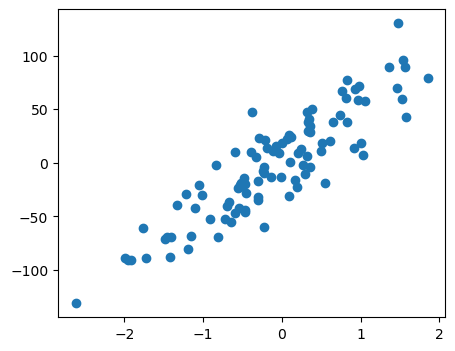

In [12]:
#lets plot our data
plt.figure(figsize=(5,4))
plt.scatter(x,y)

before building ridge regression from scratch let us try fitting ridge and simple linear using sklearn module

In [15]:
#Lets buid olse regression using sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
print('coefficient',lr.coef_)
print()
print('intercept',lr.intercept_)

coefficient [48.48127451]

intercept 2.9127883013174314


In [22]:
#lets build ridge regression using sklearn
from sklearn.linear_model import Ridge
rr=Ridge(alpha=50,solver='cholesky')
rr.fit(x,y)
print("Coefficient : ",rr.coef_)
print()
print('Intercept : ',rr.intercept_)


Coefficient :  [30.0686436]

Intercept :  1.000700705374208


If you observe coefficient and intercept of two regression model , in ridge coeff and intrcpt decreased drastically

Increased alpha value to 100 coefficients decreased even more

##### Ridge from scratch

In [48]:
class my_ridge:
    def __init__(self,alpha=1):
        self.alpha=alpha
        self.m=None
        self.b=None
        
    def fit (self, x_train,y_train):
        num=0  #to calculate numerator of coefficient
        den=0  #to cal denominator
        for i in range(x_train.shape[0]):
            num=num + (y_train[i] - np.mean(y_train)) * (x_train[i]-np.mean(x_train))
            den=den + (x_train[i]-np.mean(x_train))**2
        
        self.m=num/(den+self.alpha)
        self.b=y_train.mean() - (self.m*x_train.mean())
        print(self.m,self.b)
    
    def predict(self,x_test):
        return self.b+self.m*x_test
        


In [62]:
#lets find ceoff and intercept using our own ridge model
ridge_=my_ridge(alpha=50)
ridge_.fit(x,y)

[30.0686436] [1.00070071]


Well both sklearn and from scracth ridge model has same estimates